# 第16章 下载数据

## 1.将访问并可视化以两种常见格式存储的数据：CSV和JSON；
## 2.将使用Python模块csv来处理以CSV格式存储的天气数据，找出两个不同地区在一段时间内的最高温度和最低温度。然后，将使用matplotlib根据下载的数据创建一个图表，展示两个不同地区的气温变化。
## 3.将使用模块json来访问以JSON格式存储的人口数据，并使用Pygal绘制一幅按国别划分的人口地图。

## 16.1 CSV文件格式

#### 要在文本文件中存储数据，最简单的方式是将数据作为一系列以逗号分隔的值(CSV)写入文件。这样的文件称为CSV文件。

#### 将首先处理少量希特卡的CSV格式的天气数据，这些数据可在本书的配套资源(https://www.nostarch.com/pythoncrashcourse/) 中找到。

### 注意：
#### 这个项目使用的天气数据是从 http://www.wunderground.com/history/ 下载而来的。

### 16.1.1 分析CSV文件头

#### csv模块包含在Python标准库中，可用于分析CSV文件中的数据行，让我们能够快速提取感兴趣的值。

#### highs_lows.py

In [10]:
import csv

filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    # for row in reader:
    #    print(row)
    header_row = next(reader)
    print(header_row)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']


### 注意：
#### 文件头的格式并非总是一致的，空格和单位可能出现在奇怪的地方，这在原始数据中很常见，但不会带来任何问题。

### 16.1.2 打印文件头及其位置

#### highs_lows.py

In [2]:
import csv

filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees


### 16.1.3 提取并读取数据

#### highs_lows.py

In [11]:
import csv

# 从文件中获取最高气温
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    highs = []
    for row in reader:
        highs.append(row[1])
        
    print(highs)

['64', '71', '64', '59', '69', '62', '61', '55', '57', '61', '57', '59', '57', '61', '64', '61', '59', '63', '60', '57', '69', '63', '62', '59', '57', '57', '61', '59', '61', '61', '66']


#### 阅读器对象从其停留的地方继续往下读取CSV文件，每次都自动返回当前所处位置的下一行。

#### highs_lows.py

In [12]:
import csv

# 从文件中获取最高气温
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    highs = []
    for row in reader:
        high = int(row[1])
        highs.append(high)
        
    print(highs)

[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57, 69, 63, 62, 59, 57, 57, 61, 59, 61, 61, 66]


### 16.1.4 绘制气温表

#### highs_lows.py

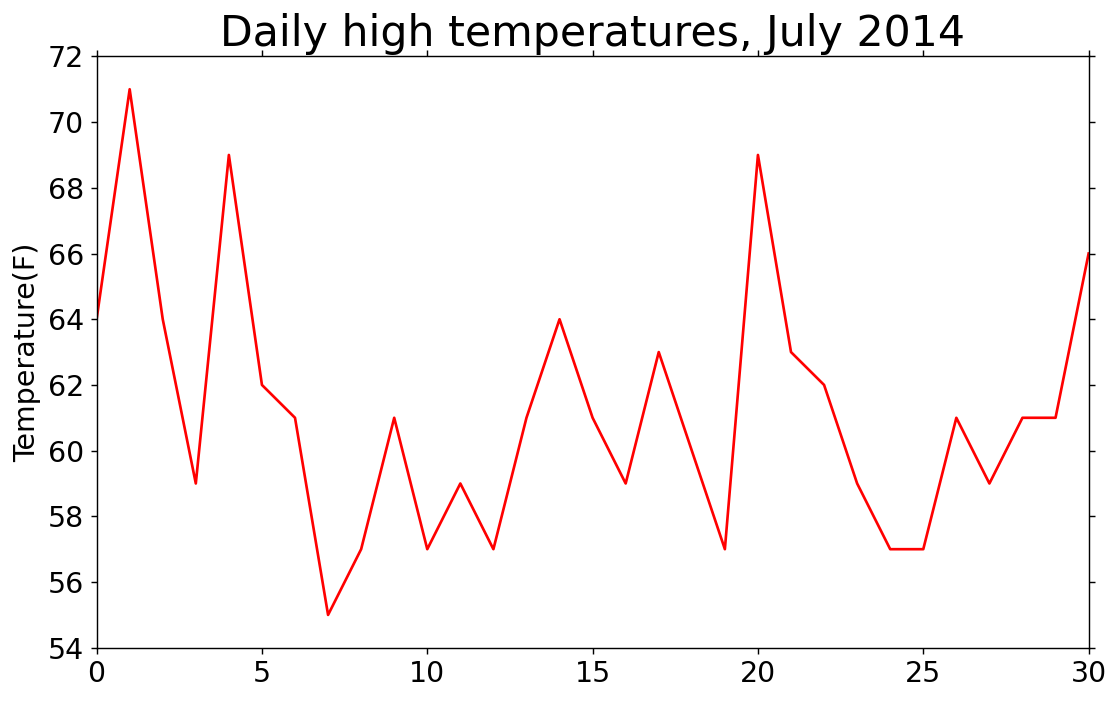

In [47]:
import csv
from matplotlib import pyplot as plt

# 从文件中获取最高气温
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    highs = []
    for row in reader:
        high = int(row[1])
        highs.append(high)
    
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6)) # figure():
plt.plot(highs, c='red')

# 设置图形的格式
plt.title("Daily high temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)
plt.ylabel("Temperature(F)", fontsize=16)
plt.tick_params(axis='both', top=True, right=True, which='both', labelsize=16) # 函数tick_params()用于设置刻度线样式
plt.axis([0, 30, 54, 72]) # axis()：用于设置横纵坐标的范围。

plt.show()

### 16.1.5 模块datetime

#### 方法strptime()可接受各种实参，并根据他们来决定如何解读日期。

### 16.1.6 在图表中添加日期

#### highs_lows.py

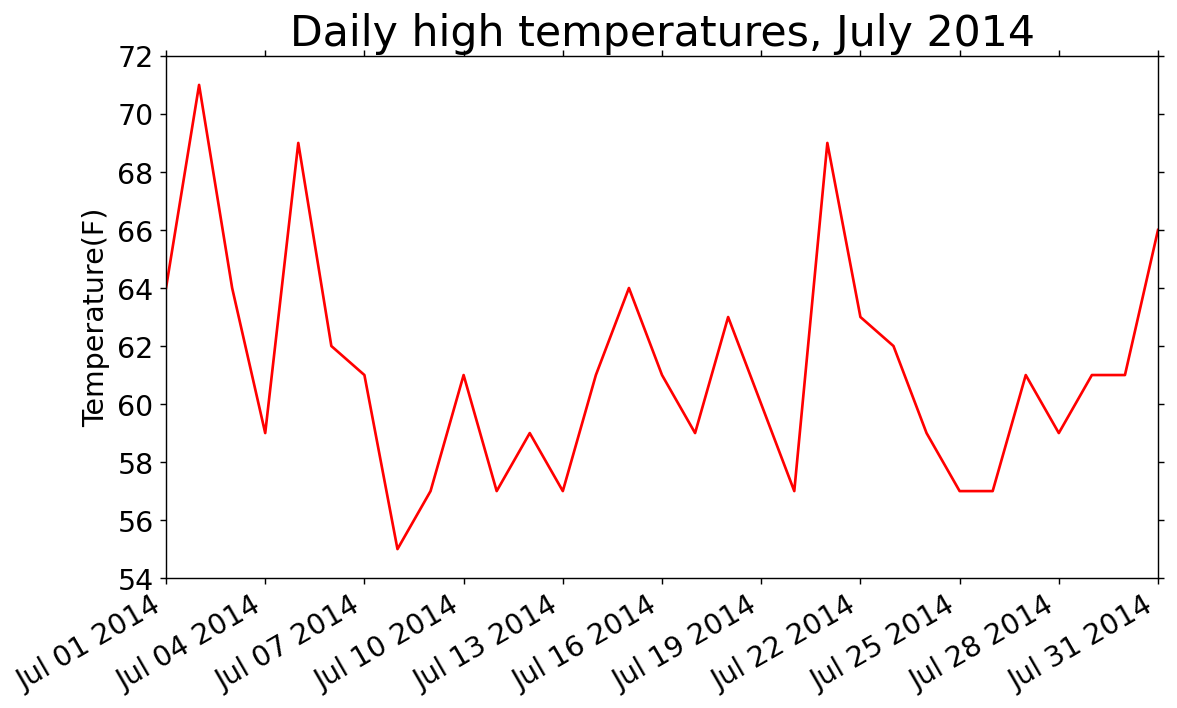

In [71]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime # 从datetime模块中导入datetime类，这是一个表示日期时间的类
from matplotlib import dates as mdates # 从matplotlib库中导入dates模块

# 从文件中获取日期和最高气温
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        high = int(row[1])
        highs.append(high)
    
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# 设置图形的格式
plt.title("Daily high temperatures, July 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate() # autofmt_xdate()：改变x轴坐标的显示方法，可以斜着表示，不用平着挤一堆
plt.ylabel("Temperature(F)", fontsize=16)
plt.tick_params(axis='both', top=True, right=True, which='both', labelsize=16)
plt.ylim(54, 72) # ylim():y轴范围
plt.xlim([datetime(2014, 7, 1),datetime(2014, 7, 31)]) # 日期上下限 # xlim():x轴范围
# plt.xlim(dates[0], dates[-1]) # 这样也可以的
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y')) # 日期格式，%B为月份名，%b为月份名缩写
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3)) # 日期间隔

plt.show()

#### 我在学习《Python编程：从入门到实践》 这本书第16.1.6这一节时，怎么也生成不了书上给出的图，经过自己的摸索和这这篇博客：https://blog.csdn.net/weixin_43091089/article/details/99311674?utm_medium=distribute.pc_aggpage_search_result.none-task-blog-2~all~sobaiduend~default-1-99311674.nonecase&utm_term=python%E7%94%BB%E5%9B%BE%E5%A6%82%E4%BD%95%E8%AE%BE%E7%BD%AE%E5%88%BB%E5%BA%A6%E9%97%B4%E9%9A%94&spm=1000.2123.3001.4430 的帮助，终于一样了！

### 16.1.7 涵盖更长的时间

#### highs_lows.py

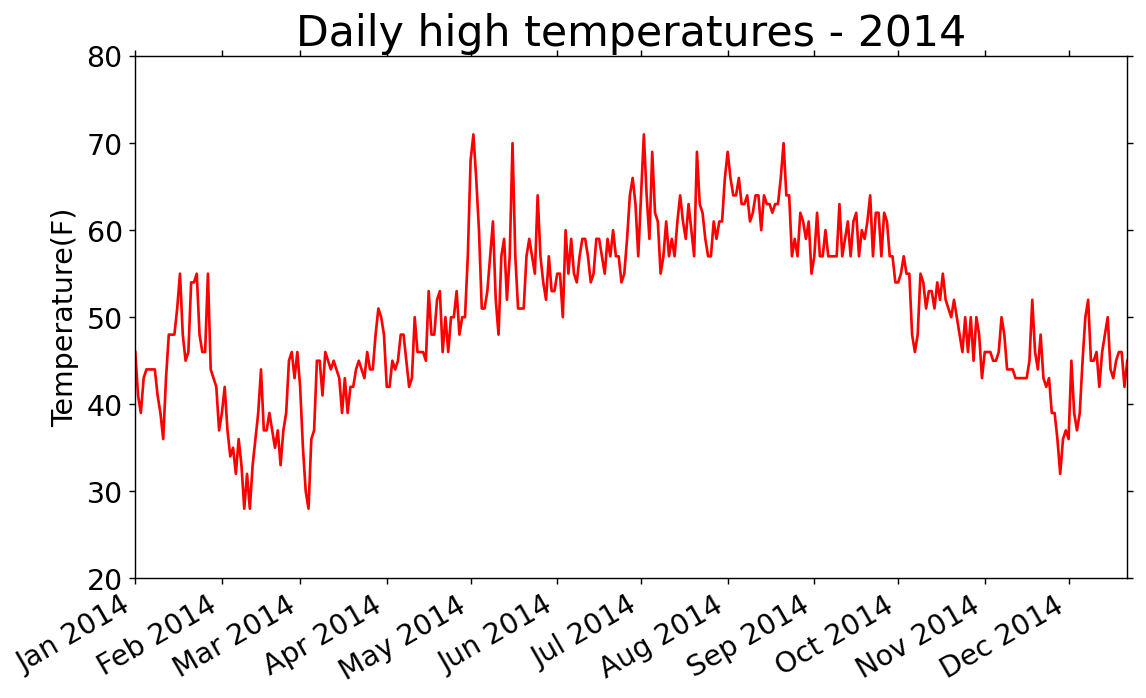

In [79]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates as mdates

# 从文件中获取日期和最高气温
filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d")
        dates.append(current_date)
        high = int(row[1])
        highs.append(high)
    
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')

# 设置图形的格式
plt.title("Daily high temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature(F)", fontsize=16)
plt.tick_params(axis='both', top=True, right=True, which='both', labelsize=16)
plt.ylim(20, 80)
plt.xlim(dates[0], dates[-1]) # 这样也可以的
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # 日期格式，%B为月份名，%b为月份名缩写

plt.show()

### 16.1.8 再绘制一个数据系列

#### highs_lows.py

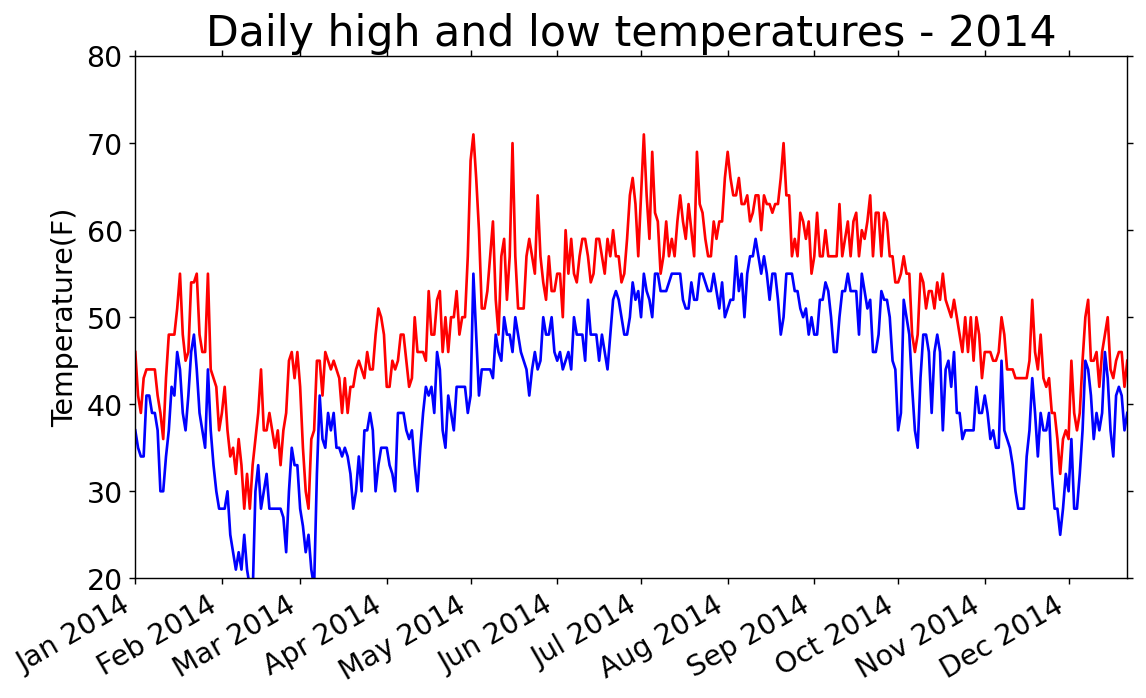

In [80]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates as mdates

# 从文件中获取日期、最高气温和最低气温
filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d") # strptime():根据指定的格式把一个时间字符串解析为时间元组
        dates.append(current_date)
        high = int(row[1])
        highs.append(high)
        low = int(row[3])
        lows.append(low)
        
    
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red')
plt.plot(dates, lows, c='blue')

# 设置图形的格式
plt.title("Daily high and low temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature(F)", fontsize=16)
plt.tick_params(axis='both', top=True, right=True, which='both', labelsize=16)
plt.ylim(20, 80)
plt.xlim(dates[0], dates[-1]) # 这样也可以的
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # 日期格式，%B为月份名，%b为月份名缩写

plt.show()

### 16.1.9 给图表区域着色

#### 方法fill_between()，它接受一个x值系列和两个y值系列，并填充两个y值系列之间的空间。

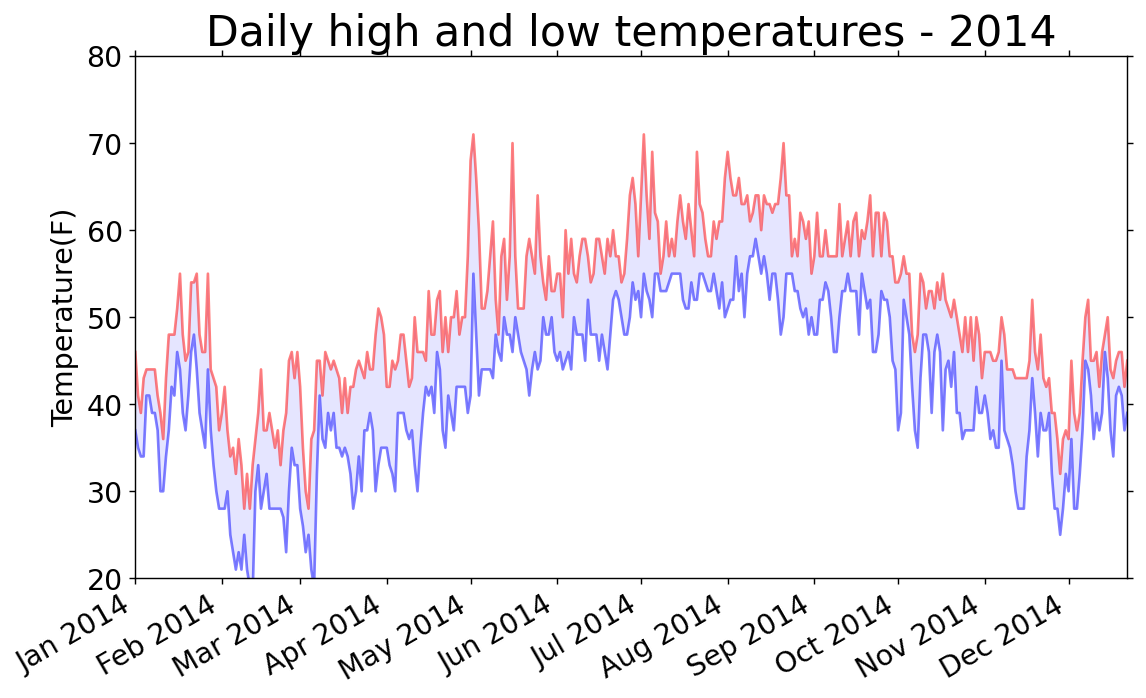

In [83]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates as mdates

# 从文件中获取日期、最高气温和最低气温
filename = 'sitka_weather_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[0], "%Y-%m-%d") # strptime():根据指定的格式把一个时间字符串解析为时间元组
        dates.append(current_date)
        high = int(row[1])
        highs.append(high)
        low = int(row[3])
        lows.append(low)
        
    
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# 设置图形的格式
plt.title("Daily high and low temperatures - 2014", fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature(F)", fontsize=16)
plt.tick_params(axis='both', top=True, right=True, which='both', labelsize=16)
plt.ylim(20, 80)
plt.xlim(dates[0], dates[-1]) # 这样也可以的
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # 日期格式，%B为月份名，%b为月份名缩写

plt.show()

#### 1.实参alpha指定颜色的透明度。Alpha值为0表示完全透明，1（默认设置）表示完全不透明。
#### 2.fill_between()参数中的facecolor指定填充区域的颜色。

### 16.1.10 错误检查
#### 为了解决数据缺失的问题，我们在从CSV文件中读取值时执行错误检查代码，对分析数据集时可能出现的异常进行处理。

2014-02-16 00:00:00 missing date


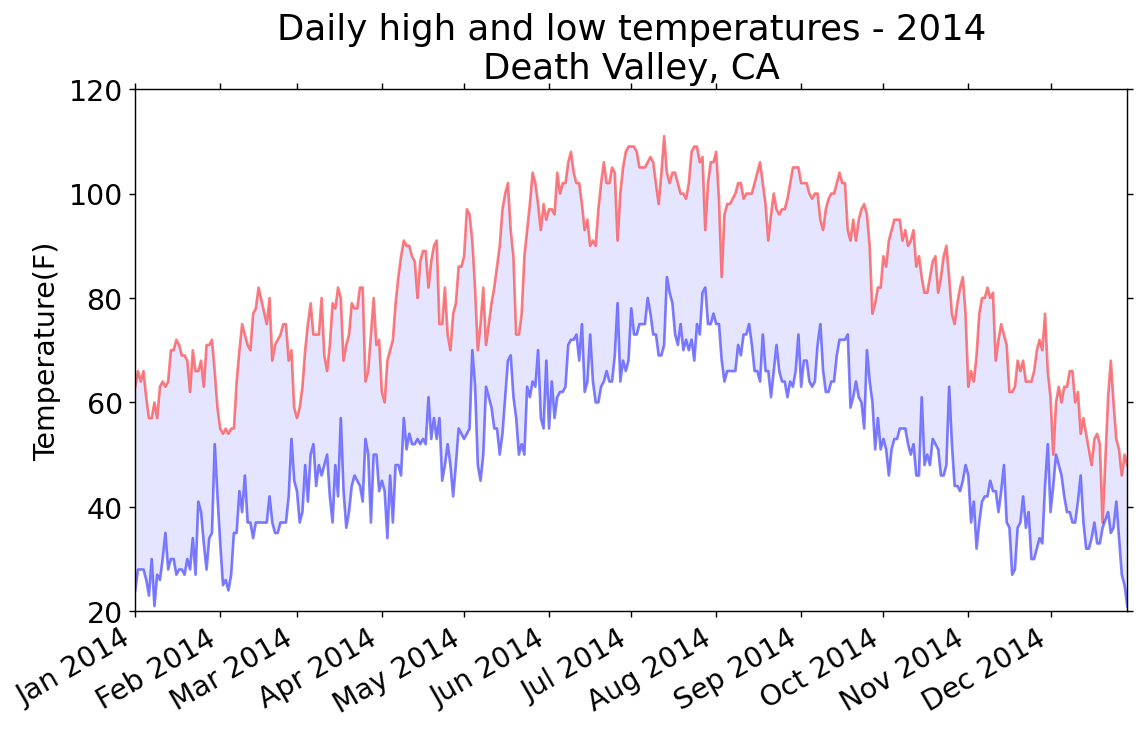

In [86]:
import csv
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates as mdates

# 从文件中获取日期、最高气温和最低气温
filename = 'death_valley_2014.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)

    dates, highs, lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0], "%Y-%m-%d") # strptime():根据指定的格式把一个时间字符串解析为时间元组 
            high = int(row[1])
            low = int(row[3])
        
        except ValueError:
            print(current_date, 'missing date')
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)
        
    
# 根据数据绘制图形
fig = plt.figure(dpi=128, figsize=(10, 6))
plt.plot(dates, highs, c='red', alpha=0.5)
plt.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# 设置图形的格式
plt.title("Daily high and low temperatures - 2014\nDeath Valley, CA", fontsize=20)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature(F)", fontsize=16)
plt.tick_params(axis='both', top=True, right=True, which='both', labelsize=16)
plt.ylim(20, 120)
plt.xlim(dates[0], dates[-1]) # 这样也可以的
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # 日期格式，%B为月份名，%b为月份名缩写

plt.show()

#### 使用的很多数据集都可能缺失数据、数据格式不正确或数据本身不正确。对于这样的情形，可使用try-except-else代码块来处理数据缺失的问题。在有些情况下，需要使用continue来跳过一些数据，或者使用remove()或del将已提取的数据删除。

#### 在做16-2、16-3、16-4这三个动手试一试时，我遇到的一个问题就是找不到题目中所说的数据，幸好找到了一篇CSDN的博客（博客地址为：http://www.baidu.com/link?url=0WHiCpa0_fPt_vTJrwVte7hsbHFjl1DdoCdIw-K8UAnzc_GiKv_17qP-U-pVIWzmzLr0WBhksszaRL8nYqBsFa&wd=&eqid=ab63176100008b60000000035fa9e874 ），通过这个博客，我找到了全书所需资源文件、源代码文件和练习题答案（下载链接：http://www.ituring.com.cn/book/1861 ），如图所示，进入网址后点击右侧“随书下载”，下载全书所需资源文件、源代码文件和练习题答案。

![resource_download_address](./screenshot/resource_download_address.PNG)

## 16.2 制作世界人口地图：JSON格式

### 16.2.1 下载世界人口数据

#### Open Knowledge Foundation（ http://data.okfn.org/ ) 提供了大量可以免费使用的数据集， 本章使用的数据就来自其中一个数据集。

### 16.2.2 提取相关的数据

#### world_population.py

In [2]:
import json

# 将数据加载到一个列表中
filename = 'population_data.json'
with open(filename) as file_object:
    pop_data = json.load(file_object)
    
# 打印每个国家2010年的人口数量
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = pop_dict['Value']
        print(country_name + ": " + population)

Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000
High income: 1127437398.85751
High income: nonOECD: 94204398.857512
High income: OECD: 1033233000
Latin America & Caribbean (all income levels): 589011025.857512
Latin America & Caribbean (developing only): 582551688
Least developed countries: UN classification: 835140827
Low & middle income: 5767157445
Low income: 796342000
Lower middle income: 2518690865
Middle East & North Africa (all income levels): 382803000
Middle East & North Africa (developing only): 331263000
Middle income: 4970815445
North America: 343539600
OECD members: 1236521688
Other small states: 18293000
Pacific island small states: 3345337
Small states: 28518337
South

### 16.2.3 将字符串转换为数字值

#### 为处理这些人口数据，我们需要将表示人口数量的字符串转换为数字值，为此需要使用int():

#### world_population.py

In [4]:
import json

# 将数据加载到一个列表中
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)
    
# 打印每个国家2010年的人口数量
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(pop_dict['Value'])
        print(country_name + ": " + str(population))

Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000


ValueError: invalid literal for int() with base 10: '1127437398.85751'

#### 原始数据的格式常常不统一，因此经常v会出现错误。导致上述错误的原因是：Python不能直接将包含小数点的字符串'1127437398.85751'转换为整数。为此，我们需要先将字符串转换为浮点数，再将浮点数转换为整数：

#### world_population.py

In [5]:
import json

# 将数据加载到一个列表中
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)
    
# 打印每个国家2010年的人口数量
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        print(country_name + ": " + str(population))

Arab World: 357868000
Caribbean small states: 6880000
East Asia & Pacific (all income levels): 2201536674
East Asia & Pacific (developing only): 1961558757
Euro area: 331766000
Europe & Central Asia (all income levels): 890424544
Europe & Central Asia (developing only): 405204000
European Union: 502125000
Heavily indebted poor countries (HIPC): 635663000
High income: 1127437398
High income: nonOECD: 94204398
High income: OECD: 1033233000
Latin America & Caribbean (all income levels): 589011025
Latin America & Caribbean (developing only): 582551688
Least developed countries: UN classification: 835140827
Low & middle income: 5767157445
Low income: 796342000
Lower middle income: 2518690865
Middle East & North Africa (all income levels): 382803000
Middle East & North Africa (developing only): 331263000
Middle income: 4970815445
North America: 343539600
OECD members: 1236521688
Other small states: 18293000
Pacific island small states: 3345337
Small states: 28518337
South Asia: 1633146000
Su

#### 函数float()将字符串转换为小数，而函数int()丢弃小数部分，返回一个整数。

### 16.2.4 获取两个字母的国别码

#### 1.Pygal中的地图制作工具要求数据为特定的格式：用国别码表示国家，以及用数字表示人口数量。
#### 2.Pygal使用的国别码存储在模块i18n（internationalization的缩写）中。字典COUNTRIES包含的键和值分别为两个字母的国家码和国家名。

#### countries.py

In [8]:
from pygal.i18n import COUNTRIES

print(COUNTRIES)
for country_code in sorted(COUNTRIES.keys()):
    print(country_code, COUNTRIES[country_code])

ModuleNotFoundError: No module named 'pygal.i18n'

#### 运行程序时报错(报错的代码行为：from pygal.i18n import COUNTRIES )，并提示模块不存在。查阅pygal文档可知，pygal已经没有i18n模块，要改用pygal_maps_world.i18n。
### 说明：
#### 事实上，pygal.i18n已经不存在了，现在已经更改成了pygal_maps_world，需要单独通过pip下载：pip install pygal_maps_world来安装pygal_maps_world 模块。

#### countries.py

In [9]:
from pygal_maps_world.i18n import COUNTRIES

for country_code in sorted(COUNTRIES.keys()):
    print(country_code, COUNTRIES[country_code])


ad Andorra
ae United Arab Emirates
af Afghanistan
al Albania
am Armenia
ao Angola
aq Antarctica
ar Argentina
at Austria
au Australia
az Azerbaijan
ba Bosnia and Herzegovina
bd Bangladesh
be Belgium
bf Burkina Faso
bg Bulgaria
bh Bahrain
bi Burundi
bj Benin
bn Brunei Darussalam
bo Bolivia, Plurinational State of
br Brazil
bt Bhutan
bw Botswana
by Belarus
bz Belize
ca Canada
cd Congo, the Democratic Republic of the
cf Central African Republic
cg Congo
ch Switzerland
ci Cote d'Ivoire
cl Chile
cm Cameroon
cn China
co Colombia
cr Costa Rica
cu Cuba
cv Cape Verde
cy Cyprus
cz Czech Republic
de Germany
dj Djibouti
dk Denmark
do Dominican Republic
dz Algeria
ec Ecuador
ee Estonia
eg Egypt
eh Western Sahara
er Eritrea
es Spain
et Ethiopia
fi Finland
fr France
ga Gabon
gb United Kingdom
ge Georgia
gf French Guiana
gh Ghana
gl Greenland
gm Gambia
gn Guinea
gq Equatorial Guinea
gr Greece
gt Guatemala
gu Guam
gw Guinea-Bissau
gy Guyana
hk Hong Kong
hn Honduras
hr Croatia
ht Haiti
hu Hungary
id Indo

#### country_codes.py

In [2]:
from pygal_maps_world.i18n import COUNTRIES

def get_country_code(country_name):
    """根据指定的国家，返回Pygal使用的两个字母的国别码"""
    for code, name in COUNTRIES.items():
        if name == country_name:
            return code
    # 如果没有找到指定的国家，就返回None
    return None

print(get_country_code('West Bank and Gaza'))
print(get_country_code('United Arab Emirates'))
print(get_country_code('Afghanistan'))

None
ae
af


#### 接下来， 在world_population.py中导入get_country_code ：

#### world_population.py

In [1]:
# 导入必要的模块
import json
from country_codes import get_country_code

# 将数据加载到一个列表中
filename = 'population_data.json'
with open(filename) as f:
    pop_data = json.load(f)
    
# 打印每个国家2010年的人口数量
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country_name)
        if code:
            print(code + ": " + str(population))
        else:
            print('ERROR - ' + country_name)

ERROR - Arab World
ERROR - Caribbean small states
ERROR - East Asia & Pacific (all income levels)
ERROR - East Asia & Pacific (developing only)
ERROR - Euro area
ERROR - Europe & Central Asia (all income levels)
ERROR - Europe & Central Asia (developing only)
ERROR - European Union
ERROR - Heavily indebted poor countries (HIPC)
ERROR - High income
ERROR - High income: nonOECD
ERROR - High income: OECD
ERROR - Latin America & Caribbean (all income levels)
ERROR - Latin America & Caribbean (developing only)
ERROR - Least developed countries: UN classification
ERROR - Low & middle income
ERROR - Low income
ERROR - Lower middle income
ERROR - Middle East & North Africa (all income levels)
ERROR - Middle East & North Africa (developing only)
ERROR - Middle income
ERROR - North America
ERROR - OECD members
ERROR - Other small states
ERROR - Pacific island small states
ERROR - Small states
ERROR - South Asia
ERROR - Sub-Saharan Africa (all income levels)
ERROR - Sub-Saharan Africa (developing

### 16.2.5 制作世界地图

#### Pygal提供了图表类型Worldmap，可帮助我们制作呈现各国数据的世界地图。

#### americas.py

In [11]:
import pygal

wm = pygal.Worldmap()
wm.title = 'North, Central, and South America'

wm.add('North America', ['ca', 'mx', 'us'])
wm.add('Central America', ['bz', 'cr', 'gt', 'hn', 'ni', 'pa', 'sv'])
wm.add('South America', ['ar', 'bo', 'br', 'cl', 'co', 'ec', 'gf', 'gy', 'pe', 'py', 'sr', 'uy', 've'])

wm.render_to_file('americas.svg')

AttributeError: module 'pygal' has no attribute 'Worldmap'

### 报错是因为之前的模块已经不存在了，需要将前两行代码代替为：
### import pygal_maps_world.maps
### wm = pygal_maps_world.maps.World()

In [12]:
import pygal_maps_world.maps

wm = pygal_maps_world.maps.World() # 创建World实例
wm.title = 'North, Central, and South America' # 设置该地图的title属性

wm.add('North America', ['ca', 'mx', 'us'])
wm.add('Central America', ['bz', 'cr', 'gt', 'hn', 'ni', 'pa', 'sv'])
wm.add('South America', ['ar', 'bo', 'br', 'cl', 'co', 'ec', 'gf', 'gy', 'pe', 'py', 'sr', 'uy', 've'])

wm.render_to_file('americas.svg')

#### 1.方法add():它接受一个标签和一个列表，其中后者包含我们要突出的国家的国别码；
#### 2.每次调用add()都将为指定的国家选择一种颜色，并在图表左边显示该颜色和指定的标签；
#### 3.方法render_to_file()创建一个包含该图表的.svg文件，可以在浏览器中打开它。

![map16_7.PNG](./result/map16_7.PNG)

### 16.2.6 在世界地图上呈现数字数据

#### na_populations.py

In [13]:
import pygal_maps_world.maps

wm = pygal_maps_world.maps.World() # 创建World实例
wm.title = 'Populations of Countries in North America'
wm.add('North America', {'ca': 34126000, 'us': 309349000, 'mx': 113423000})

wm.render_to_file('na_populations.svg')

#### 1.这次通过第二个实参传递了一个字典而不是列表。这个字典将两个字母的Pygal国别码作为键，将人口数量作为值；
#### 2.Pygal根据这些数字自动给不同国家着以深浅不一的颜色（人口最少的国家颜色最浅，人口最深的国家颜色最深）。

![map16_8.PNG](./result/map16_8.PNG)

### 16.2.7 绘制完整的世界人口地图

#### 要呈现其他国家的人口数量，需要将前面处理的数据转换为Pygal要求的字典格式：键为两个字母的国别码，值为人口数量。

#### world_population.py

In [8]:
# 导入必要的模块
import json
import pygal_maps_world.maps
from country_codes import get_country_code

# 将数据加载到列表中
filename = '/home/yyh/Documents/VSCode_work/chapter16/population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# 创建一个包含人口数量的字典
cc_populations = {}    
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country)
        if code:
            cc_populations[code] = population

wm = pygal_maps_world.maps.World()
wm.title = 'World Population in 2010, by Country'
wm.add('2010', cc_populations)

wm.render_to_file('/home/yyh/Documents/VSCode_work/chapter16/world_population.svg')

![map16_9.PNG](./result/map16_9.PNG)

### 16.2.8 根据人口数量将国家分组

#### world_population.py

In [9]:
# 导入必要的模块
import json
import pygal_maps_world.maps
from country_codes import get_country_code

# 将数据加载到列表中
filename = '/home/yyh/Documents/VSCode_work/chapter16/population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# 创建一个包含人口数量的字典
cc_populations = {}    
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country)
        if code:
            cc_populations[code] = population

# 根据人口数量将所有的国家分成三组
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

# 看看每组分别包含多少个国家
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

wm = pygal_maps_world.maps.World()
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file('/home/yyh/Documents/VSCode_work/chapter16/world_population.svg')

85 69 2


![wm16_10.PNG](./result/wm16_10.PNG)

#### 在每组中，各个国家都按人口从少到多着以从浅到深的颜色。

### 16.2.9 使用Pygal设置世界地图的样式

#### world_population.py

In [4]:
# 导入必要的模块
import json
import pygal_maps_world.maps
from country_codes import get_country_code
from pygal.style import RotateStyle

# 将数据加载到列表中
filename = '/home/yyh/Documents/VSCode_work/chapter16/population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# 创建一个包含人口数量的字典
cc_populations = {}    
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country)
        if code:
            cc_populations[code] = population

# 根据人口数量将所有的国家分成三组
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

# 看看每组分别包含多少个国家
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

wm = pygal_maps_world.maps.World()
wm_style = RotateStyle('#336699') # 提供了一种淡蓝色基底；返回一个样式对象，并将其存储在wm_style中
wm = pygal_maps_world.maps.World(style=wm_style) # 以关键字实参的方式传递样式对象
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file('/home/yyh/Documents/jupyter_work/world_population_3.svg')

85 69 2


![wm_16_11.PNG](./result/wm_16_11.PNG)

#### 1.创建RotateStyle类的实例时，需要提供一个实参——十六进制的RGB颜色；
#### 2.Pygal将根据指定的颜色为每组选择颜色；
#### 3.十六进制格式的RGB颜色是一个以井号（#）打头的字符串，后面跟着6个字符，其中前两个字符表示红色分量，接下来的两个表示绿色分量，最后两个表示蓝色分量。每个分量的取值范围为00（没有相应的颜色）～FF（包含最多的相应颜色）；
#### 4.如果在线搜索hex color chooser（十六进制颜色选择器），可找到让你能够尝试选择不同的颜色并显示其RGB值的工具。

### 16.2.10 加亮颜色主题

#### 1.Pygal通常默认使用较暗的颜色主题，可使用LightColorizedStyle加亮地图的颜色；
#### 2.LightColorizedStyle类修改整个图表的主题，包括背景色、标签以及各个国家的颜色；

#### 要使用LightColorizedStyle样式，先导入它：
#### from pygal.style import LightColorizedStyle
#### 然后就可以独立地使用LightColorizedStyle了，如：
#### wm_style = LightColorizedStyle

#### world_population.py

In [10]:
# 导入必要的模块
import json
import pygal_maps_world.maps
from country_codes import get_country_code
from pygal.style import LightColorizedStyle

# 将数据加载到列表中
filename = '/home/yyh/Documents/VSCode_work/chapter16/population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# 创建一个包含人口数量的字典
cc_populations = {}    
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country)
        if code:
            cc_populations[code] = population

# 根据人口数量将所有的国家分成三组
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

# 看看每组分别包含多少个国家
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

wm = pygal_maps_world.maps.World()
wm_style = LightColorizedStyle
wm = pygal_maps_world.maps.World(style=wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file('/home/yyh/Documents/jupyter_work/world_population_4.svg')

85 69 2


![wm_16_12.PNG](./result/wm_16_12.PNG)

#### 然而使用这个类时，你不能直接控制使用的颜色，Pygal将选择默认的颜色。要设置颜色，可使用RotateStyle，并将LightColorizedStyle作为基本样式。为此，导入LightColorizedStyle 和RotateStyle ：
#### from pygal.style import LightColorizedStyle, RotateStyle
#### 再使用RotateStyle 创建一种样式， 并传入另一个实参base_style ：
#### wm_style = RotateStyle('#336699', base_style=LightColorizedStyle)

#### world_population.py

In [11]:
# 导入必要的模块
import json
import pygal_maps_world.maps
from country_codes import get_country_code
from pygal.style import LightColorizedStyle, RotateStyle

# 将数据加载到列表中
filename = '/home/yyh/Documents/VSCode_work/chapter16/population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# 创建一个包含人口数量的字典
cc_populations = {}    
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country)
        if code:
            cc_populations[code] = population

# 根据人口数量将所有的国家分成三组
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

# 看看每组分别包含多少个国家
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

wm = pygal_maps_world.maps.World()
wm_style = RotateStyle('#336699', base_style=LightColorizedStyle)
wm = pygal_maps_world.maps.World(style=wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file('/home/yyh/Documents/jupyter_work/world_population_5.svg')

85 69 2


#### 设置了较亮的主题，同时根据通过实参传递的颜色给各个国家着色。

#### 尝试为不同的可视化选择合适的样式设置指令时， 在import 语句中指定别名会有所帮助：
#### from pygal.style import LightColorizedStyle as LCS, RotateStyle as RS
#### 这样， 样式定义将更短：
#### wm_style = RS('#336699', base_style=LCS)

#### world_population.py

In [12]:
# 导入必要的模块
import json
import pygal_maps_world.maps
from country_codes import get_country_code
from pygal.style import LightColorizedStyle as LCS, RotateStyle as RS

# 将数据加载到列表中
filename = '/home/yyh/Documents/VSCode_work/chapter16/population_data.json'
with open(filename) as f:
    pop_data = json.load(f)

# 创建一个包含人口数量的字典
cc_populations = {}    
for pop_dict in pop_data: # 将每个字典依次存储在pop_dict中
    if pop_dict['Year'] == '2010':
        country = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country)
        if code:
            cc_populations[code] = population

# 根据人口数量将所有的国家分成三组
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

# 看看每组分别包含多少个国家
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

wm = pygal_maps_world.maps.World()
wm_style = RS('#336699', base_style=LCS)
wm = pygal_maps_world.maps.World(style=wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file('/home/yyh/Documents/jupyter_work/world_population_5.svg')

85 69 2


## 16.3 小结

### 在本章中，学习了：
#### 1.如何使用网上的数据集； 
#### 2.如何处理CSV和JSON文件， 以及如何提取感兴趣的数据；
#### 3.如何使用matplotlib来处理以往的天气数据， 包括如何使用模块datetime ， 以及如何在同一个图表中绘制多个数据系列；
#### 4.如何使用Pygal绘制呈现各国数据的世界地图， 以及如何设置Pygal地图和图表的样式；
#### 5.有了使用CSV和JSON文件的经验后， 你将能够处理几乎任何要分析的数据。 大多数在线数据集都可以以这两种格式中的一种或两种下载。 学习使用这两种格式为学习使用其他格式的数据做好了准备。